In [97]:
a = np.array([[1,2],[3,4]])
b = np.array([[7,8],[9,10],[11,12]])

In [100]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [105]:
b = np.array([[7,8],[9,10]])
b

array([[ 7,  8],
       [ 9, 10]])

In [98]:
print(np.concatenate((a,b),axis=0))  #aixs=0 열통합

[[ 1  2]
 [ 3  4]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [106]:
print(np.concatenate((a,b),axis=1))  #axis=행통합

[[ 1  2  7  8]
 [ 3  4  9 10]]


In [107]:
np.random.seed(100)

In [108]:
mu,sigma = 0.0, 3.0

In [109]:
from sklearn.datasets import load_iris
import pandas as pd

In [110]:
#붓꽃 데이터셋을 로딩하고 DataFrame으로 변환한다.
iris=load_iris()
iris_data = iris.data 
iris_df = pd.DataFrame(data=iris_data,columns = iris.feature_names)

## 붓꽃 데이터

In [111]:
from sklearn.preprocessing import StandardScaler


#standardScaler객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 셋 변환, fit()와 transform()호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

In [ ]:
transform()t시 scale변환된 데이터 셋이 numpy ndarray로 반환되어 이르 ㄹDataFrame으로 변환
iris_scaled_df1 = pd.DataFrame(iris_scaled,columns = iris.feature_names)
# iris_scaled_df.describe()
print('feature들의 평균 값')
print(iris_scaled_df1.mean())

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [117]:
# Generate some data from five different probability distributions
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional properties of the original sample
# and a boxplot is one visual tool to make this assessment
numDists = 5
randomDists = ['Normal(1,1)','Lognormal(1,1)','Exp(1)','Gumbel(6,4)','Triangular(2,9,11)']

N = 500
norm = np.random.normal(1,1,N)
logn = np.random.lognormal(1,1,N)
expo = np.random.exponential(1,N)
gumb = np.random.triangular(2,9,11,N)
tria = np.random.triangular(2,9,11,N)

In [119]:
# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
bootstrapIndices = np.random.random_integers(0, N - 1, N)
normBoot = norm[bootstrapIndices]
expoBoot = expo[bootstrapIndices]
gumbBoot = gumb[bootstrapIndices]
lognBoot = logn[bootstrapIndices]
triaBoot = tria[bootstrapIndices]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29096\3466104742.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 499 + 1) instead
  bootstrapIndices = np.random.random_integers(0, N - 1, N)


In [120]:
data = [norm, normBoot, logn, lognBoot, expo, expoBoot, gumb, gumbBoot,
        tria, triaBoot]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29096\3946639687.py:2: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title('A Boxplot Example')


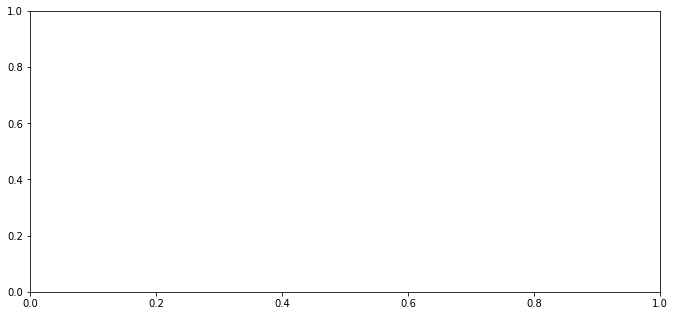

In [121]:
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [9]:
# DecisionTree Classifier생성
dt_clf = DecisionTreeClassifier(random_state=156)

In [10]:
#붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier학습 
dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=156)

In [13]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일을 생성함
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

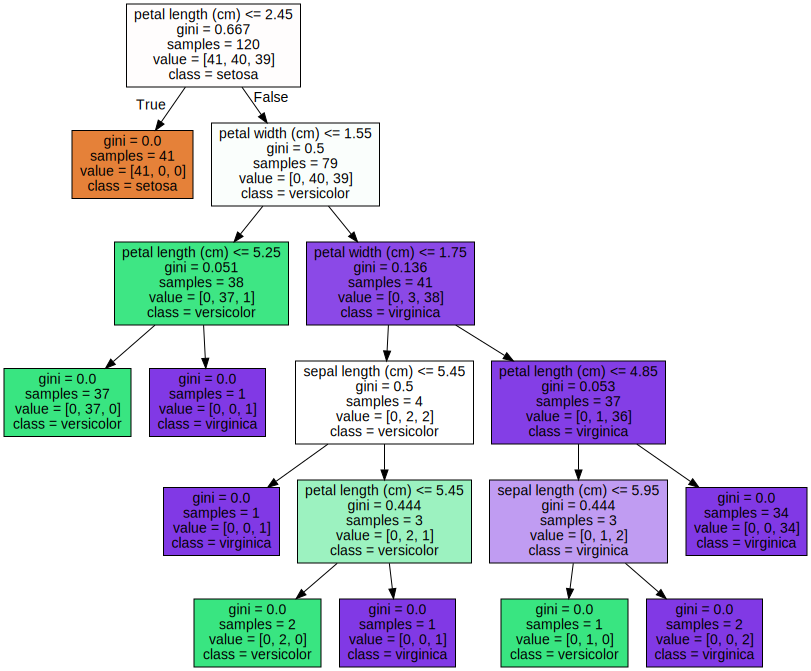

In [17]:
import graphviz
#위에서 생성된 tree.dot파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [19]:
import seaborn as sns
import numpy as np 
%matplotlib inline

In [20]:
#feature importance 추출
print("Feature importances:\n{0}.format(np.round(dt_clf.feature_importances_,3)))

SyntaxError: EOL while scanning string literal (3799090645.py, line 2)

In [21]:
#feature별 importance매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))

sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

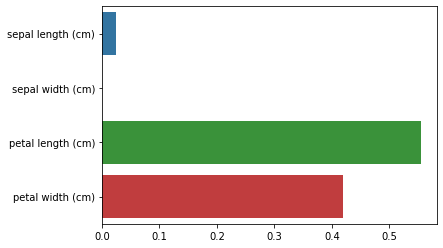

In [22]:
#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)